In [1]:
import numpy as np
from jupyterthemes import jtplot
jtplot.style()
from matplotlib import pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from MyMLLib.PlotUtil import Generate_cmap, PlotLossAndAccuracy
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
def funcMeatW(w):
    return 3.3/1345.0*w - 3.3/1345.0*1373.0 + 4.1

def invFuncMeatW(meatW):
    return 1345.0/3.3 * (meatW + 3.3/1345.0 * 1373.0 - 4.1)

def funcW(h):
    return 0.00070368 * h * h + 0.00192257 * h - 1.81865

def invFuncW(w, allowError=0.00001):
    #require weight
    inter = w 
    #funcW(h) = 14000 equals funcW(h) - 14000 = 0
    
    def targetFunc(x):
        return funcW(x) - inter
    #gradTargetFunc = gradFuncW

    x_now = 5000

    for i in range(1000):
        y_now = targetFunc(x_now)
        grad_now = gradFuncW(x_now)
        #0 = grad_now(x-x_now)+y_now
        #x-x_now = -y_now/grad_now
        x_new = x_now - y_now/grad_now
        error = abs(targetFunc(x_new) - targetFunc(x_now))
        x_now = x_new
        if(error < allowError):
            break;

    print("height:", x_now)
    print("error:", error)
    print("roop", i)
    return x_now

def gradFuncW(h):
    return 2 * 0.00070368 * h + 0.00192257 



In [3]:
def getXandYByIndex(frame, X_idx, y_idx):
    X = frame.iloc[:,X_idx].values.reshape(-1,1)
    y = frame.iloc[:,y_idx].values
    return X, y

quadric = PolynomialFeatures(degree=2)
def quadRegression(X, y):
    mod = LinearRegression()
    X_quad = quadric.fit_transform(X)
    mod_quad = mod.fit(X_quad, y)
    #y_pred = mod_quad.predict(quadric.fit_transform(X_fit))
    return mod_quad

def plotQuadModel(mod_quad, start=0, end=1500, step=1):
    X_fit = np.arange(start, end, 1)[:, np.newaxis]
    y_pred = mod_quad.predict(quadric.fit_transform(X_fit))
    plt.scatter(np.array(X_fit), np.array(y_pred), color="yellow", s=5)


,milk_count,height [cm]
0,0,44
1,0,44
2,0,44
3,5,53
4,5,53
5,5,53
6,10,64
7,10,64
8,10,64
9,15,83


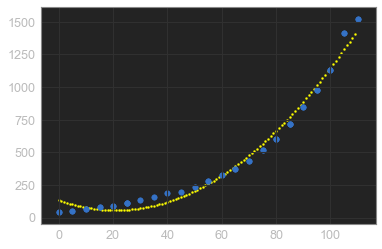

In [4]:
frame = pd.read_csv("mh_data.csv")
frame[0:30]

X, y = getXandYByIndex(frame, 0, 1)
mod = quadRegression(X, y)
plotQuadModel(mod, 0, X.max())
plt.scatter(X, y)


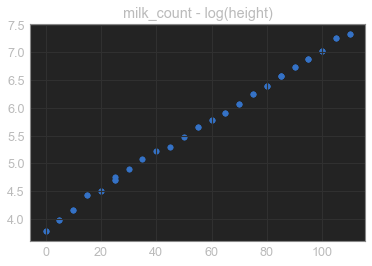

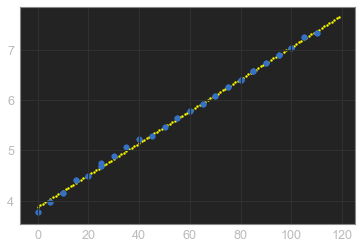

array([ 0.03173416])

3.8776941851373898

1.03306918218
48.3126864281


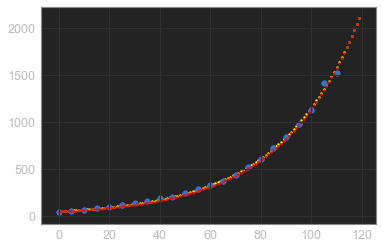

In [5]:
#get Y = log(y) regression

logY = np.log(y)
plt.scatter(X, logY)
plt.title('milk_count - log(height)')
plt.show()


mod = LinearRegression()
mod_log = mod.fit(X, logY)

X_pred = np.arange(0, 120, 1)[:, np.newaxis]

y_pred = mod.predict(X_pred)

plt.scatter(X_pred, y_pred, color="yellow",s=5)
plt.scatter(X, logY)
plt.show()

mod.coef_
mod.intercept_

def predFuncH(X):
    return np.exp(3.8776941851373898) * np.exp(0.03173416 * X)

plt.scatter(X_pred, predFuncH(X_pred), color="yellow",s=5)
plt.scatter(X, y)

print(np.exp(0.03253416))
print(np.exp(3.8776941851373898))

# h = h_now * (e^0.03173416)^m
# log(h) = log(h_now) + 0.03173416m
# m = (log(h) - log(h_now))/0.03173416

#m = log(h/h_now) / 0.03173416

def invFuncH(h_now, h):
    return np.log(h/h_now)/0.03253416

#初期値44kgでフィッティングした場合
def funcH(h_now, milk):
    return h_now * np.exp(0.03253416 * milk)

plt.scatter(X_pred, funcH(44, X_pred), color="red",s=5)


In [6]:
def yEqual(X, a):
    return a * (X + 1)/(X + 1)


height: 10822.582051401947
error: 4.190951585769653e-09
roop 5


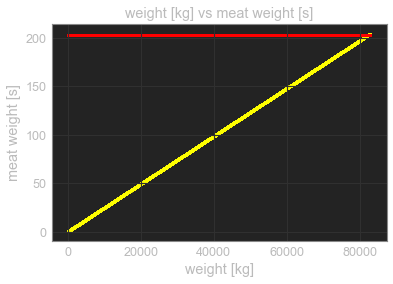

82439.81818181819 [kg]


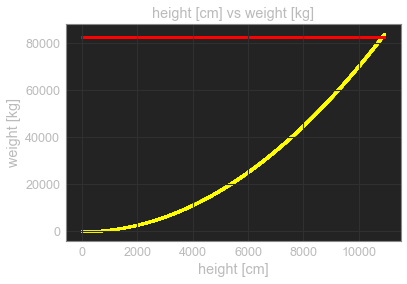

10822.582051401947 [cm]


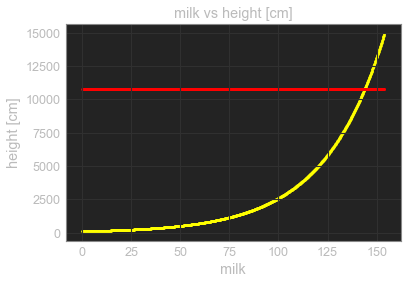

143.978512888 count


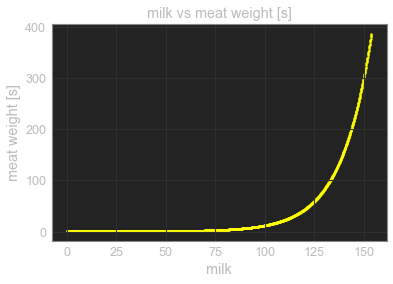

In [7]:
h_now = 100

target_meat_weight = 203
target_weight = invFuncMeatW(target_meat_weight)
target_height = invFuncW(target_weight)
target_milk = invFuncH(h_now,target_height)

#def funcYEqual(X, a):
#    return np.ones((-1,X.shape[]))




X_weight = np.arange(0, target_weight + 500, 1)[:, np.newaxis]
tmp = plt.scatter(X_weight, funcMeatW(X_weight),color='yellow',s=5) 
tmp = plt.scatter(X_weight, yEqual(X_weight,target_meat_weight),color='red',s=5) 
tmp = plt.title("weight [kg] vs meat weight [s]")
tmp = plt.xlabel("weight [kg]")
tmp = plt.ylabel("meat weight [s]")
tmp = plt.show()
print(target_weight, '[kg]')

X_height = np.arange(0, target_height + 100, 1)[:, np.newaxis]
tmp = plt.scatter(X_height, funcW(X_height),color='yellow',s=5) 
tmp = plt.scatter(X_height, yEqual(X_height,target_weight),color='red',s=5) 
tmp = plt.title("height [cm] vs weight [kg]")
tmp = plt.xlabel("height [cm]")
tmp = plt.ylabel("weight [kg]")
tmp = plt.show()

print(target_height, '[cm]')

X_milk = np.arange(0, target_milk+10, 0.1)[:, np.newaxis]
tmp = plt.scatter(X_milk, funcH(h_now,X_milk),color='yellow',s=5) 
tmp = plt.scatter(X_milk, yEqual(X_milk,target_height),color='red',s=5) 
tmp = plt.title("milk vs height [cm]")
tmp = plt.xlabel("milk")
tmp = plt.ylabel("height [cm]")
tmp = plt.show()
print(target_milk, 'count')


y = funcMeatW(funcW(funcH(h_now, X_milk[0:1800])))

tmp = plt.scatter(X_milk[0:1800], y,color='yellow',s=5) 
#tmp = plt.scatter(X_milk, yEqual(X_milk,target_meat_weight),color='red',s=5) 
tmp = plt.title("milk vs meat weight [s]")
tmp = plt.xlabel("milk")
tmp = plt.ylabel("meat weight [s]")
tmp = plt.show()


